In [9]:
%matplotlib inline
import matplotlib
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from h5py import File


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)
import json

# Load in Data

<>:136: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:136: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_1124651/42848752.py:136: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if ii is 0:lims = [x0g-ran/rancut[jj],x0g+ran/rancut[jj]]


100
Readout length =  5000
Readout window =  [1400, 6200]
Digital atten =  -24
Readout freq =  7.78992
Single shot readout fidility from channel  I  =  0.4484
Single shot readout fidility from channel  Q  =  0.15974
---------------------------
Single shot readout fidility from channel  I  after rotation =  0.7691976919769198
Optimal angle = -0.3277241664255019
Single shot readout fidility from channel  Q  after rotation =  0.003400068001360027
Optimal angle = -0.3277241664255019
---------------------------


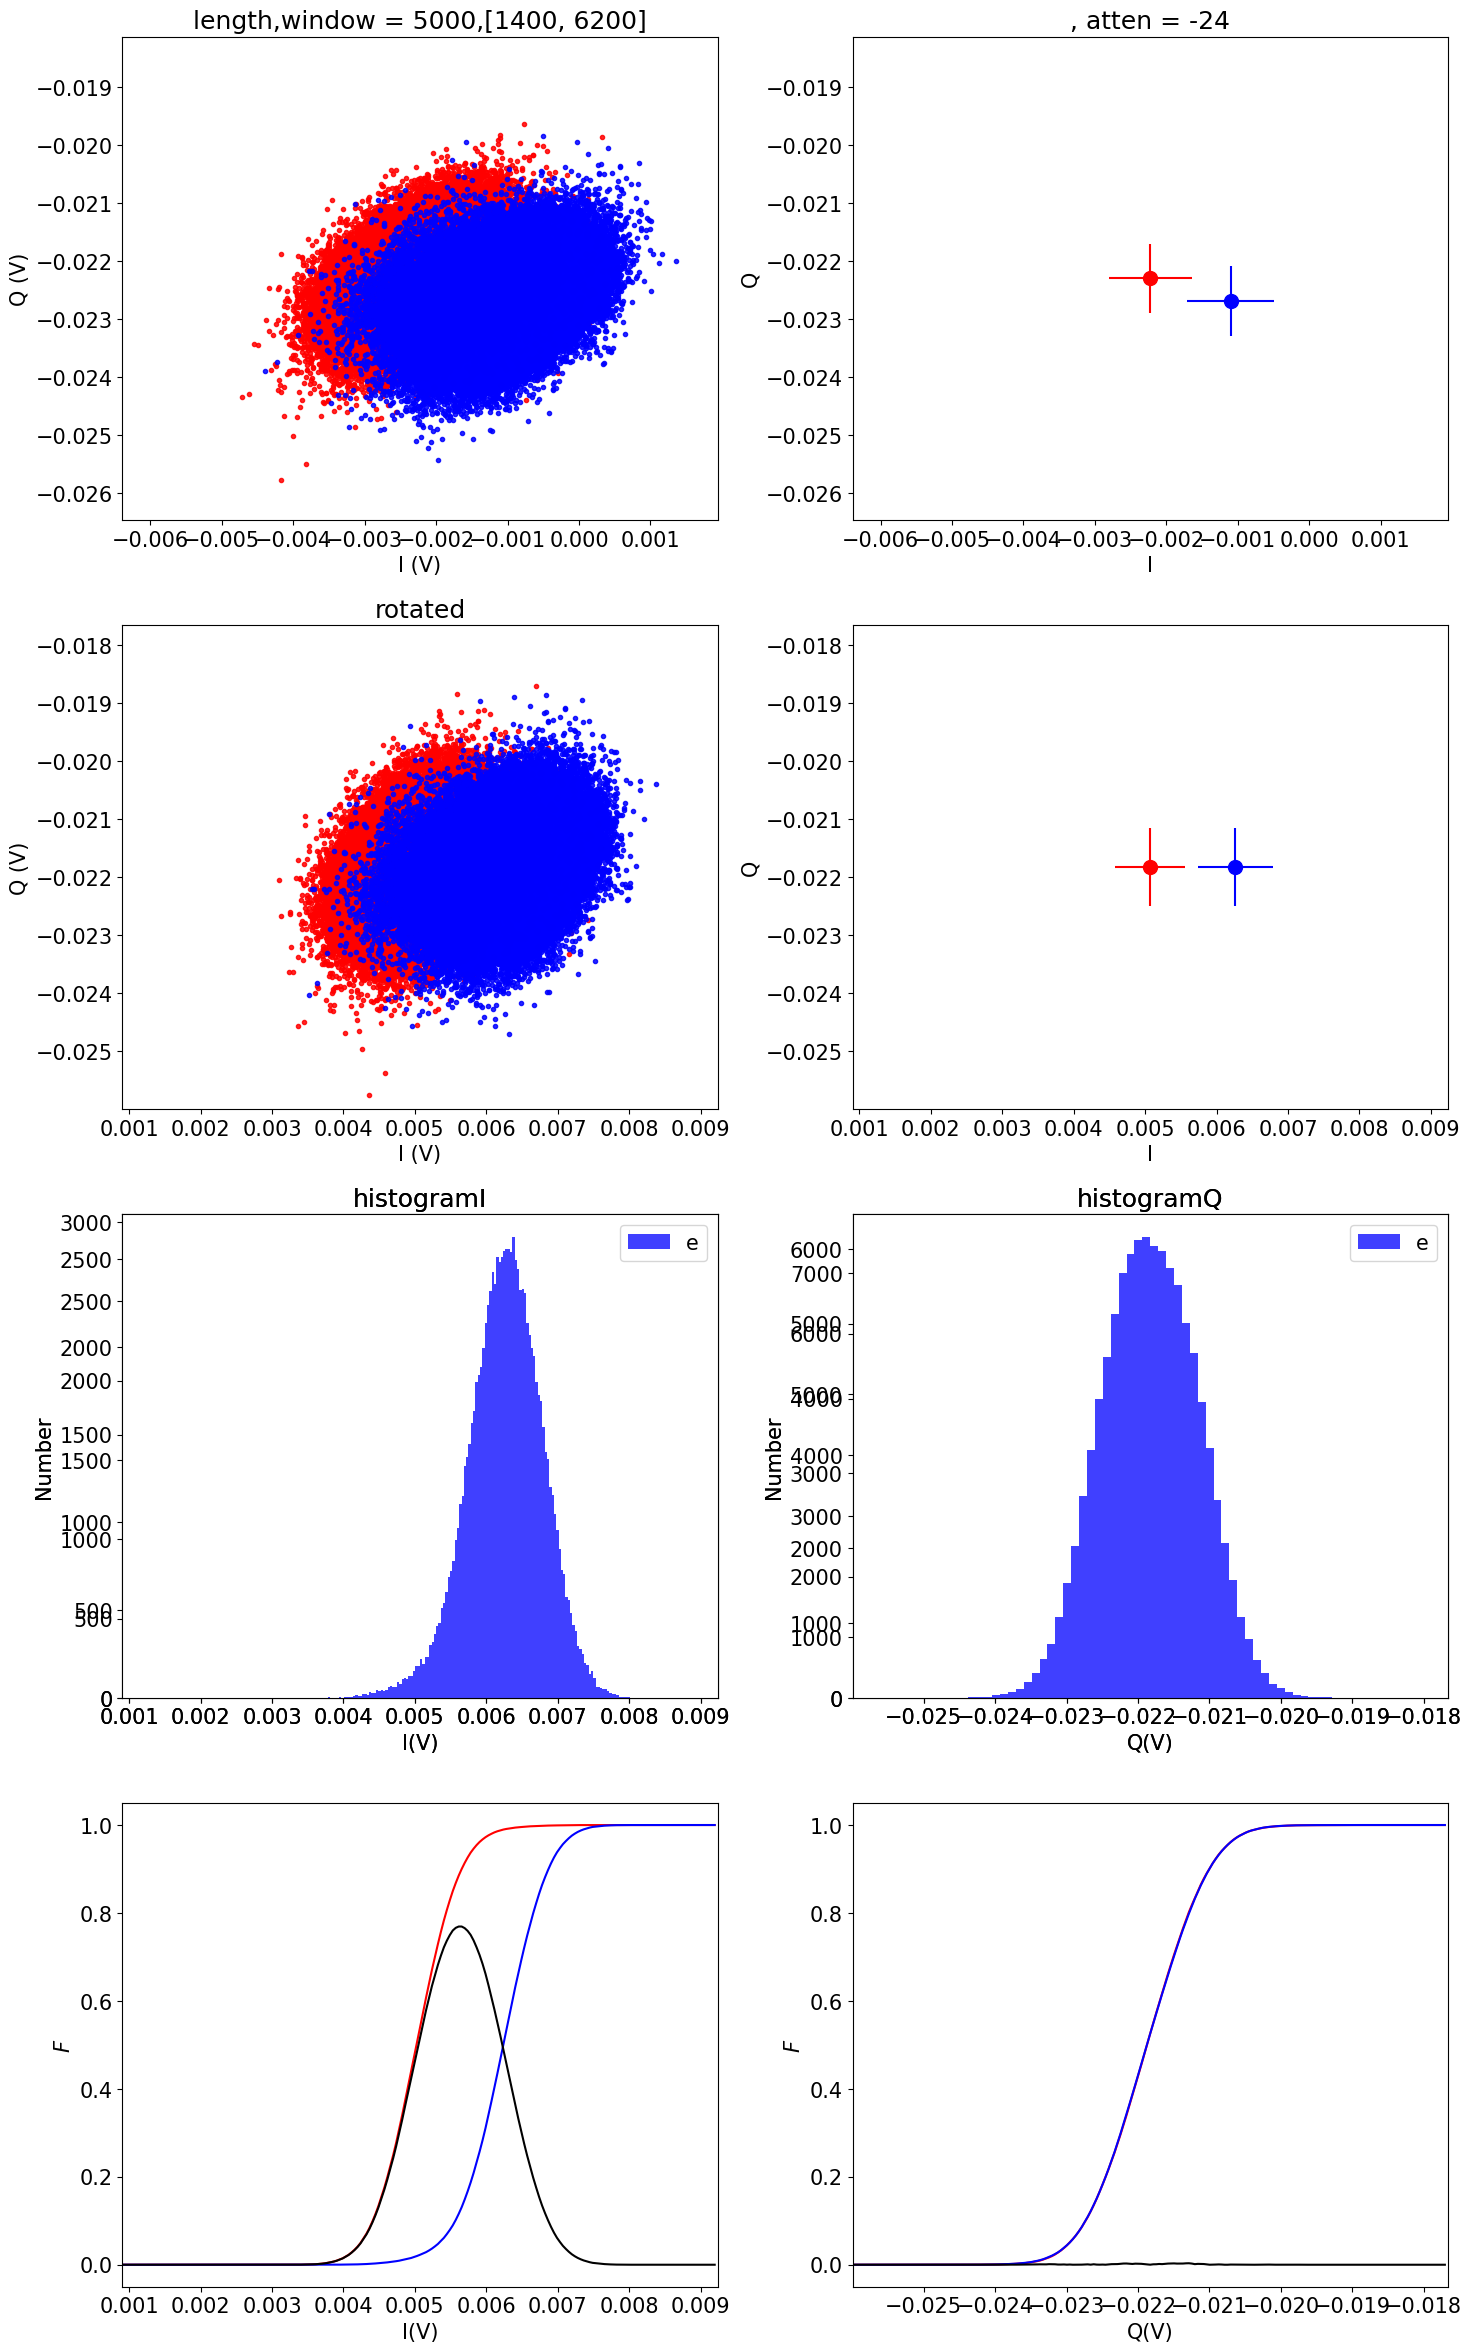

In [10]:
expt_name = 'histogram'
filelist = [1051]

tags = ['','','']


skip_f = True
if skip_f:
    range_val = 2
else:
    range_val = 3
    
rancut = [30,30,30]

for jj, i in enumerate(filelist):
#     filename = "S:/_Data/2021-10-22 Multimode cooldown 16 with JPA as of 2022-05-04/data/"
    filename = str(i).zfill(5) + "_"+expt_name.lower()+".h5"

    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range']

        expt_cfg = (json.loads(a.attrs['experiment_cfg']))[expt_name.lower()]
        numbins = expt_cfg['numbins']
        print (numbins)
        numbins = 200
        a_num = expt_cfg['acquisition_num']
        ns = expt_cfg['num_seq_sets']
        readout_length = quantum_device_cfg['readout']['length']
        window = quantum_device_cfg['readout']['window']
        atten = quantum_device_cfg['readout']['dig_atten']
        print ('Readout length = ',readout_length)
        print ('Readout window = ',window)
        print ("Digital atten = ",atten)
        print ("Readout freq = ",quantum_device_cfg['readout']['freq'])
        I = array(a['I'])
        Q = array(a['Q'])
        sample = a_num
        
        I,Q = I/2**15*ran,Q/2**15*ran
        
        colors = ['r','b','g']
        labels= ['g','e','f']
        titles=['I','Q']

        IQs = mean(I[::3],1),mean(Q[::3],1),mean(I[1::3],1),mean(Q[1::3],1),mean(I[2::3],1),mean(Q[2::3],1)
        IQsss = I.T.flatten()[0::3],Q.T.flatten()[0::3],I.T.flatten()[1::3],Q.T.flatten()[1::3], \
                I.T.flatten()[2::3],Q.T.flatten()[2::3]
        
        fig = plt.figure(figsize=(15,7*5))

        ax = fig.add_subplot(621,title= 'length,window = ' + str(readout_length) + ','+str(window))
        x0g,y0g  = mean(IQsss[0][::int(a_num/sample)]),mean(IQsss[1][::int(a_num/sample)])
        x0e,y0e  = mean(IQsss[2][::int(a_num/sample)]),mean(IQsss[3][::int(a_num/sample)])
        phi = arctan((y0e-y0g)/(x0e-x0g))
        for ii in range(range_val):
            ax.plot(IQsss[2*ii][:],IQsss[2*ii+1][:],'.',color = colors[ii],alpha=0.85)

        ax.set_xlabel('I (V)')
        ax.set_ylabel('Q (V)') 
        ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        ax.set_ylim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        
        

        ax = fig.add_subplot(622,title= tags[jj] + ', atten = ' + str(atten))
        
        for ii in range(range_val):
            ax.errorbar(mean(IQsss[2*ii]),mean(IQsss[2*ii+1]),xerr = std(IQsss[2*ii]),
                        yerr = std(IQsss[2*ii+1]),fmt = 'o',color=colors[ii],markersize=10)
        ax.set_xlabel('I')
        ax.set_ylabel('Q')

        ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        ax.set_ylim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        
    
        IQsssrot = (I.T.flatten()[0::3]*cos(phi) + Q.T.flatten()[0::3]*sin(phi),
                    -I.T.flatten()[0::3]*sin(phi) + Q.T.flatten()[0::3]*cos(phi),
                    I.T.flatten()[1::3]*cos(phi) + Q.T.flatten()[1::3]*sin(phi),
                            -I.T.flatten()[1::3]*sin(phi) + Q.T.flatten()[1::3]*cos(phi),
                           I.T.flatten()[2::3]*cos(phi) + Q.T.flatten()[2::3]*sin(phi),
                            -I.T.flatten()[2::3]*sin(phi) + Q.T.flatten()[2::3]*cos(phi))

        
        
        ax = fig.add_subplot(623,title= 'rotated')
        x0g,y0g  = mean(IQsssrot[0][:]),mean(IQsssrot[1][:])
        x0e,y0e  = mean(IQsssrot[2][:]),mean(IQsssrot[3][:])

        for ii in range(range_val):
            ax.plot(IQsssrot[2*ii][:],IQsssrot[2*ii+1][:],'.',color = colors[ii],alpha=0.85)

        ax.set_xlabel('I (V)')
        ax.set_ylabel('Q (V)') 
        ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        ax.set_ylim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        
        ax = fig.add_subplot(624)
        
        for ii in range(range_val):
            ax.errorbar(mean(IQsssrot[2*ii]),mean(IQsssrot[2*ii+1]),xerr = 
                        std(IQsssrot[2*ii]),yerr = std(IQsssrot[2*ii+1]),fmt = 'o',color=colors[ii],markersize=10)
        ax.set_xlabel('I')
        ax.set_ylabel('Q')

        ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        ax.set_ylim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        
        for kk in range(4):

            ax = fig.add_subplot(6,2,kk%2+5,title= expt_name + titles[kk%2] )
            ax.hist(IQsssrot[kk], bins=numbins ,alpha=0.75,color=colors[int(kk/2)],label = labels[int(kk/2)])
            ax.set_xlabel(titles[kk % 2] + '(V)')
            ax.set_ylabel('Number')
            ax.legend()
            if kk%2 == 0:
                ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
            else:
                ax.set_xlim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        

    
    for ii,i in enumerate(['I','Q']):
        sshg, ssbinsg = np.histogram(IQsss[ii], bins=numbins)
        sshe, ssbinse = np.histogram(IQsss[ii+2], bins=numbins)
        fid = np.abs(((np.cumsum(sshg) - np.cumsum(sshe)) / sshg.sum())).max()

        print ("Single shot readout fidility from channel ",i," = ",fid)
    print ('---------------------------')
    
    for ii,i in enumerate(['I','Q']):
        if ii is 0:lims = [x0g-ran/rancut[jj],x0g+ran/rancut[jj]]
        else:lims  = [y0g-ran/rancut[jj],y0g+ran/rancut[jj]]
        sshg, ssbinsg = np.histogram(IQsssrot[ii], bins=numbins,range =lims )
        sshe, ssbinse = np.histogram(IQsssrot[ii+2], bins=numbins,range =lims)
        fid = np.abs(((np.cumsum(sshg) - np.cumsum(sshe)) / sshg.sum())).max()

        print ("Single shot readout fidility from channel ",i," after rotation = ",fid)
        print ("Optimal angle =",phi)
    
        ax = fig.add_subplot(6,2,7+ii)
        ax.plot(ssbinse[:-1],cumsum(sshg)/sshg.sum(),color='r')
        ax.plot(ssbinse[:-1],cumsum(sshe)/sshg.sum(),color='b')
        ax.plot(ssbinse[:-1],np.abs(cumsum(sshe)-cumsum(sshg))/sshg.sum(),color='k')
        if ii == 0:
            ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        else:
            ax.set_xlim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        ax.set_xlabel(titles[ii] + '(V)')
        ax.set_ylabel('$F$')
    print ('---------------------------')
    
    fig.tight_layout()

# Hardware parameters

In [12]:
readout_time_frac = 0.05
acq_num = 2000

# Extract statistics

In [14]:
gdatI = IQsssrot[0]
edatI = IQsssrot[2]

gmean_true = np.mean(gdatI)
emean_true = np.mean(edatI)

gvar_true = np.var(gdatI)
evar_true = np.var(edatI)

# Sampling function

In [15]:
# Simulate a measurement corresponding to when the qubit is in e; includes decay during readout
def sample_e_once(gmean, emean, gvar, evar, readout_time_frac):
    if np.random.uniform() < readout_time_frac:
        e_sample = np.random.normal(loc=gmean, scale=np.sqrt(gvar))
    else:
        e_sample = np.random.normal(loc=emean, scale=np.sqrt(evar))
    return e_sample


def sample_ge(acq_num, gmean, emean, gvar, evar, readout_time_frac):
    g_samples = np.random.normal(loc=gmean, scale=np.sqrt(gvar), size=acq_num)
    e_samples = []
    # Modeling readout decay
    for _ in range(acq_num):
        e_samples.append(sample_e_once(gmean, emean, gvar, evar, readout_time_frac))
    return g_samples, e_samples

0.00508000580328891 0.0062116881106126865


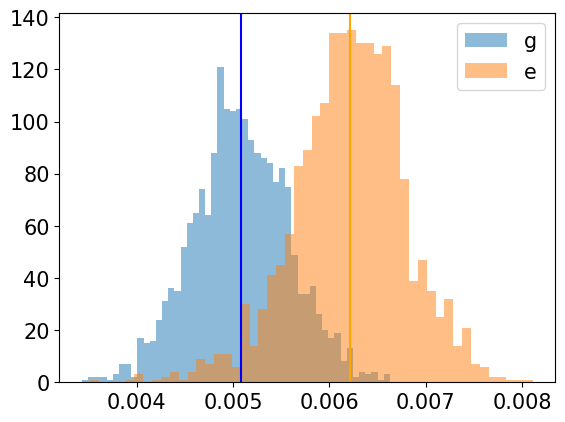

In [26]:
# Simulate the voltage values that will be assigned to the qubit g and e
g_samples, e_samples = sample_ge(acq_num, gmean_true, emean_true, gvar_true, evar_true, readout_time_frac)

gmean_sample = np.mean(g_samples)
emean_sample = np.mean(e_samples)
print(gmean_sample, emean_sample)

# plt.plot(np.arange(len(g_samples)), g_samples)
# plt.plot(np.arange(len(e_samples)), e_samples)
# plt.axhline(gmean_sample, color='blue')
# plt.axhline(emean_sample, color='orange')

# plot histograms of the simulated data
plt.hist(g_samples, bins=50, alpha=0.5, label='g')
plt.hist(e_samples, bins=50, alpha=0.5, label='e')
# show mean values
plt.axvline(gmean_sample, color='blue')
plt.axvline(emean_sample, color='orange')
plt.legend()


# Simulate populations with error

Expected: 0.8
Error Simulated: 0.7746884722039584
(2000,)


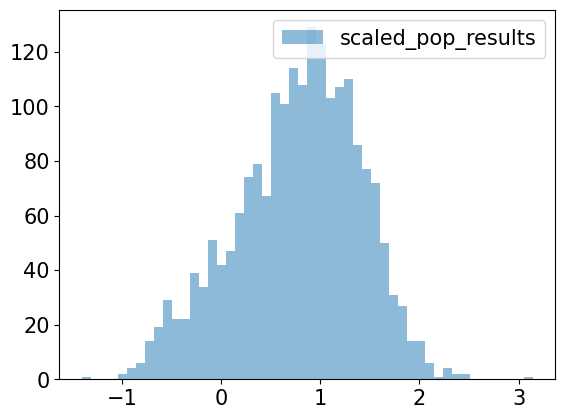

In [27]:
expected_pop = 0.8

# measurement simulation with randomness
def measure_pop(acq_num, expected_pop, gmean, emean, gvar, evar, readout_time_frac):
    sample_results = []
    for _ in range(acq_num):
        if np.random.uniform() > expected_pop:
            sample_results.append(np.random.normal(loc=gmean, scale=np.sqrt(gvar)))
        else:
            sample_results.append(sample_e_once(gmean, emean, gvar, evar, readout_time_frac))
    return sample_results

pop_results = measure_pop(acq_num, expected_pop, gmean_true, emean_true, gvar_true, evar_true, readout_time_frac)


# scale raw voltage results to 0-1
def do_pi_calibration(gmean_sample, emean_sample, pop_results, return_on_avg=False):
    if return_on_avg:
        results = np.mean(pop_results)
    else:
        results = pop_results
    scaled_vals = (results - gmean_sample) / (emean_sample - gmean_sample)
    return scaled_vals

print("Expected:", expected_pop)
scaled_pop_results = do_pi_calibration(gmean_sample, emean_sample, pop_results, return_on_avg=False)
print("Error Simulated:", scaled_pop_results.mean())

# print shape of scaled_pop_results
print(scaled_pop_results.shape)

# plot histogram of scaled_pop_results
plt.hist(scaled_pop_results, bins=50, alpha=0.5, label='scaled_pop_results')
plt.legend()



In [8]:
include_q_pops = True

# Given expected cavity populations, outputs a simulated measurement based on the hardware parameters
# Takes as input the expected cavity populations; currently does not take expected qubit populations
def measure_pop_vector(acq_num, expected_pops, gmean_true, emean_true, gvar_true, evar_true, readout_time_frac,
                      gmean_sample, emean_sample, include_q_pops=False):
    sample_results_all = []
    for expected_pop in expected_pops:
        sample_results = measure_pop(acq_num, expected_pop, gmean_true, emean_true, 
                                     gvar_true, evar_true, readout_time_frac)
        sample_results_pi_cal = do_pi_calibration(gmean_sample, emean_sample, sample_results)
        sample_results_all.append(sample_results_pi_cal)
    if include_q_pops:
        # calculating g level from last 3 cavity levels, only appropriate for qubit in g (not given qubit populations
        # in the expected_pops variable)
#         if np.mean(np.mean(np.array(sample_results_all[-3:]), axis=0)) < 0:
#             sample_results_all.append(1 + np.mean(np.array(sample_results_all[-3:]), axis=0))
#             sample_results_all.append(-np.mean(np.array(sample_results_all[-4:-1]), axis=0))
#         else:  # if/else used to avoid having > 1 or < 0
#             sample_results_all.append(1 - np.mean(np.array(sample_results_all[-3:]), axis=0))
#             sample_results_all.append(np.mean(np.array(sample_results_all[-4:-1]), axis=0))
            
#         sample_results_all = sample_results_all[-2:] + sample_results_all[:-2]

        # given expected qubit population in expected_pops variable
        sample_results_all = sample_results_all[:1] + [1 - sample_results_all[0]] + sample_results_all[2:]
        # avoid having > 1 or < 0
        if np.mean(sample_results_all[0]) > 1:
            sample_results_all[0] /= np.mean(sample_results_all[0])
            sample_results_all = sample_results_all[:1] + [1 - sample_results_all[0]] + sample_results_all[2:]
        
    means = np.mean(sample_results_all, axis=1)
    covar = np.cov(sample_results_all, rowvar=True)
    return sample_results_all, means, covar

# qubit g population, qubit e population, then all cavity populations
test_vector = [0.7, 0.3, 0.9, 0.05, 0.039, 0.006, 0.0, 0.0, 0.005]
pop_results_vector, pop_results_mean, pop_results_cov = measure_pop_vector(acq_num, test_vector, gmean_true, 
                                                                           emean_true, gvar_true, evar_true, 
                                                                           readout_time_frac,
                                                                           gmean_sample, emean_sample,
                                                                           include_q_pops=include_q_pops)
print(pop_results_cov)
print(pop_results_mean)
print(np.sum(pop_results_mean) - 1)

[[ 4.62312622e-01 -4.62312622e-01  3.13108171e-03  3.29559907e-03
   2.95580268e-03 -1.78562963e-03  7.65921538e-04 -1.21521026e-02
   1.84902783e-04]
 [-4.62312622e-01  4.62312622e-01 -3.13108171e-03 -3.29559907e-03
  -2.95580268e-03  1.78562963e-03 -7.65921538e-04  1.21521026e-02
  -1.84902783e-04]
 [ 3.13108171e-03 -3.13108171e-03  3.48100954e-01  3.56336300e-03
   2.04298574e-03 -6.38104232e-03  8.72403961e-04 -1.72154678e-04
   1.26484409e-02]
 [ 3.29559907e-03 -3.29559907e-03  3.56336300e-03  2.44912929e-01
   7.47596858e-03  2.39162751e-03  7.52179452e-03  1.71473895e-03
  -3.40458632e-03]
 [ 2.95580268e-03 -2.95580268e-03  2.04298574e-03  7.47596858e-03
   2.35800760e-01  6.29139931e-03 -2.47442224e-03 -1.20174247e-02
   1.80570420e-04]
 [-1.78562963e-03  1.78562963e-03 -6.38104232e-03  2.39162751e-03
   6.29139931e-03  2.10014349e-01 -1.79626395e-03 -3.92619920e-04
  -1.65218508e-03]
 [ 7.65921538e-04 -7.65921538e-04  8.72403961e-04  7.52179452e-03
  -2.47442224e-03 -1.7962639

# Additional normalizations

In [9]:
# Compensate for normalizing total population to 1
if include_q_pops:
    norm_factor = np.sum(pop_results_mean[2:])
else:
    norm_factor = np.sum(pop_results_mean)
print(norm_factor)

# Carry out the normalizing on the mean vector and covariance matrix
pop_results_mean_norm = np.append(pop_results_mean[:2],  pop_results_mean[2:] / norm_factor)
pop_results_cov_norm = pop_results_cov / norm_factor**2
for j in range(2):  # g and e populations are not included in the normalizing of cavity populations to 1
    pop_results_cov_norm[:,j] *= norm_factor
    pop_results_cov_norm[j,:] *= norm_factor

    
# Compensate for taking absolute value of negative populations
neg_val_inds = np.where(pop_results_mean_norm < 0)
for ind in neg_val_inds:
    pop_results_mean_norm[ind] *= -1
    pop_results_cov_norm[:,ind] *= -1
    pop_results_cov_norm[ind,:] *= -1

1.004811245422338


# Final Results

In [10]:
print(pop_results_mean_norm)
print(pop_results_cov_norm)

[0.71848001 0.28151999 0.91933373 0.03789959 0.02357627 0.0062811
 0.00792193 0.01004156 0.00505418]
[[ 4.62312622e-01 -4.62312622e-01  3.11608943e-03  3.27981906e-03
   2.94164969e-03 -1.77707967e-03  7.62254146e-04 -1.20939158e-02
  -1.84017430e-04]
 [-4.62312622e-01  4.62312622e-01 -3.11608943e-03 -3.27981906e-03
  -2.94164969e-03  1.77707967e-03 -7.62254146e-04  1.20939158e-02
   1.84017430e-04]
 [ 3.11608943e-03 -3.11608943e-03  3.44775375e-01  3.52932045e-03
   2.02346809e-03 -6.32008110e-03  8.64069459e-04 -1.70510000e-04
  -1.25276042e-02]
 [ 3.27981906e-03 -3.27981906e-03  3.52932045e-03  2.42573155e-01
   7.40454700e-03  2.36877912e-03  7.44993514e-03  1.69835721e-03
   3.37206064e-03]
 [ 2.94164969e-03 -2.94164969e-03  2.02346809e-03  7.40454700e-03
   2.33548040e-01  6.23129450e-03 -2.45078288e-03 -1.19026163e-02
  -1.78845343e-04]
 [-1.77707967e-03  1.77707967e-03 -6.32008110e-03  2.36877912e-03
   6.23129450e-03  2.08007979e-01 -1.77910336e-03 -3.88869030e-04
   1.6364009

# Real Measurement Data

{'mode_index': 3, 'N_max': 15, 'singleshot': True, 'acquisition_num': 10000, 'on_qubits': ['1'], 'pi_calibration': True, 'prep_cav_amp': 0.5, 'prep_cav_len': 0, 'prep_cav_phase': 0.0, 'states_list': ['0', '0+1', '1', 'alpha', '0+alpha', 'alpha+-alpha', 'SNAP_g1'], 'state': 'alpha', 'cavity_pulse_type': 'gauss', 'snap_cav_amps': [0.56084, 0.292], 'snap_cav_lens': [100.0, 100.0], 'snap_phase': 1.57, 'use_weak_drive': True, 'weak_cavity_prep_alpha_only': False, 'use_qubit_channel': False, 'pi_qubit_first': False}
-314.24248458333335 -140.993536375
Cavity population variances: [1.06433807 1.03162099 1.01982912 1.01296221 1.00740153 1.05127985
 1.01620997 1.01201071 1.03851261 1.01201273 1.01565492 1.01166097
 1.01831176 1.00776889 1.01762167]
{'mode_index': 3, 'N_max': 15, 'singleshot': True, 'acquisition_num': 10000, 'on_qubits': ['1'], 'pi_calibration': True, 'prep_cav_amp': 0.5, 'prep_cav_len': 4, 'prep_cav_phase': 0.0, 'states_list': ['0', '0+1', '1', 'alpha', '0+alpha', 'alpha+-alpha'

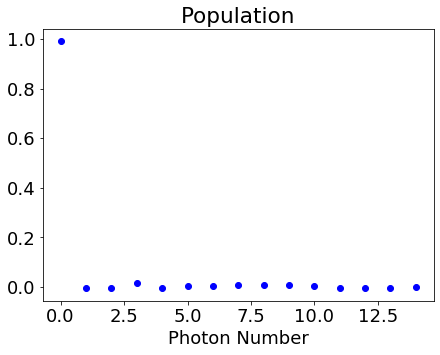

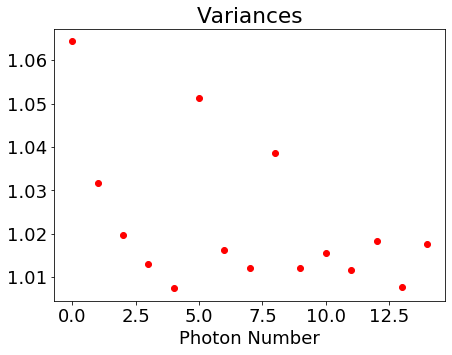

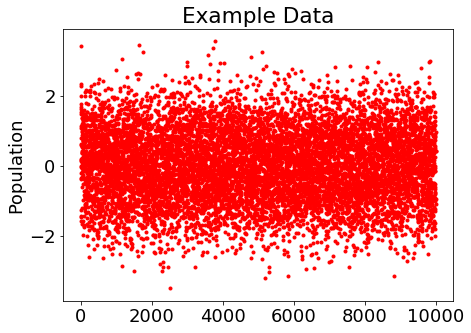

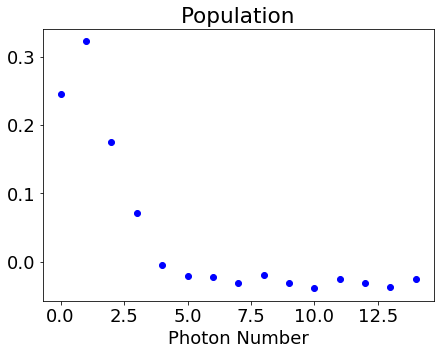

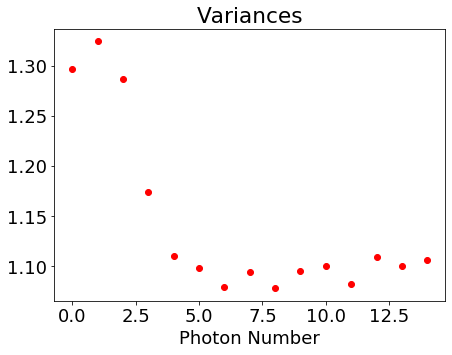

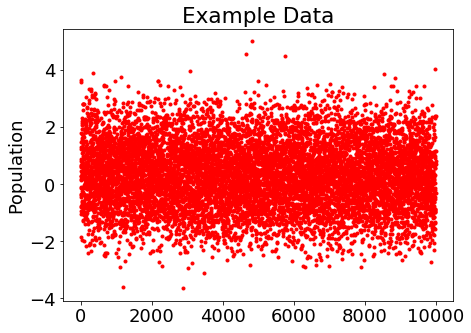

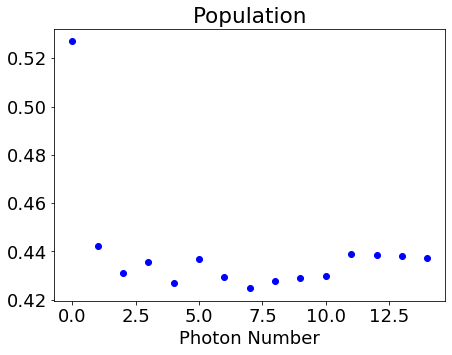

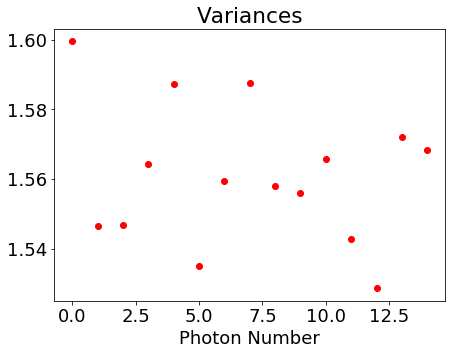

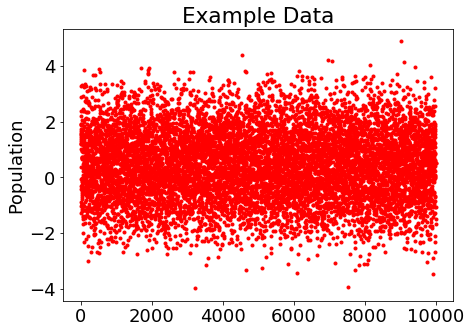

In [11]:
expt_name = 'photon_number_distribution_measurement'
filelist = [2054,2055,2057]

titles = ['qubit in g']
shows = ['I']

import math
import scipy.special
from scipy.optimize import curve_fit


for ii,i in enumerate(filelist):
#     filename = "S:\\_Data\\2021-10-22 Multimode cooldown 16 with JPA as of 2022-05-04\\data\\" + \
#                 str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    filename = str(i).zfill(5) + "_"+expt_name.lower()+".h5"

    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        swp_cfg = (json.loads(a.attrs['experiment_cfg']))[expt_name.lower()]
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))['photon_number_distribution_measurement']
        print(expt_cfg)
#         print ("cavity pulse type", expt_cfg['cavity_pulse_type'], expt_cfg['mode_index'])
        nu_c = quantum_device_cfg['flux_pulse_info']['1']['cavity_freqs'][expt_cfg['mode_index']]
        chis = quantum_device_cfg['flux_pulse_info']['1']['chiby2pi_e']
        I,Q = array(a['I']),array(a['Q'])
        
#         print(len(I), len(I[0]), I)
        
        g_val = np.mean(I[-2])
        e_val = np.mean(I[-1])
        print(g_val, e_val)
        use_Is = (I - g_val) / (e_val - g_val)
        
        means = np.mean(use_Is, axis=1)[:-2]
#         print(means)
        
        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(111)
        ax.plot(np.arange(len(means)), means, 'bo')
        ax.set_title("Population")
        ax.set_xlabel("Photon Number")
        
        variances = np.var(use_Is, axis=1)[:-2]
        print("Cavity population variances:", variances)
        
        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(111)
        ax.plot(np.arange(len(variances)), variances, 'ro')
        ax.set_title("Variances")
        ax.set_xlabel("Photon Number")
        
        cov_mat = np.cov(use_Is[:-2])
        
        peak_to_look_at = 1
        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(111)
        ax.plot(np.arange(len(use_Is[1])), use_Is[peak_to_look_at], 'r.')
        ax.set_title("Example Data")
        ax.set_ylabel("Population")

{'mode_index': 3, 'N_max': 15, 'singleshot': True, 'acquisition_num': 10000, 'on_qubits': ['1'], 'pi_calibration': True, 'prep_cav_amp': 0.5, 'prep_cav_len': 0, 'prep_cav_phase': 0.0, 'states_list': ['0', '0+1', '1', 'alpha', '0+alpha', 'alpha+-alpha', 'SNAP_g1'], 'state': 'alpha', 'cavity_pulse_type': 'gauss', 'snap_cav_amps': [0.56084, 0.292], 'snap_cav_lens': [100.0, 100.0], 'snap_phase': 1.57, 'use_weak_drive': True, 'weak_cavity_prep_alpha_only': False, 'use_qubit_channel': False, 'pi_qubit_first': False}
{'mode_index': 3, 'N_max': 15, 'singleshot': True, 'acquisition_num': 10000, 'on_qubits': ['1'], 'pi_calibration': True, 'prep_cav_amp': 0.5, 'prep_cav_len': 4, 'prep_cav_phase': 0.0, 'states_list': ['0', '0+1', '1', 'alpha', '0+alpha', 'alpha+-alpha', 'SNAP_g1'], 'state': 'alpha', 'cavity_pulse_type': 'gauss', 'snap_cav_amps': [0.56084, 0.292], 'snap_cav_lens': [100.0, 100.0], 'snap_phase': 1.57, 'use_weak_drive': True, 'weak_cavity_prep_alpha_only': False, 'use_qubit_channel': 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


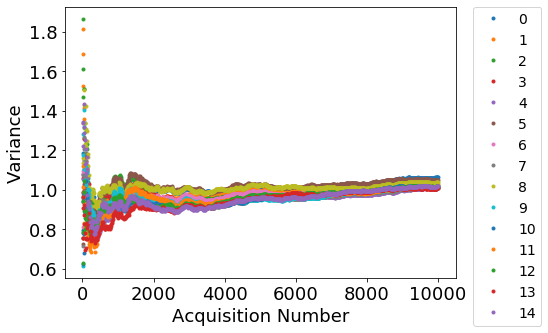

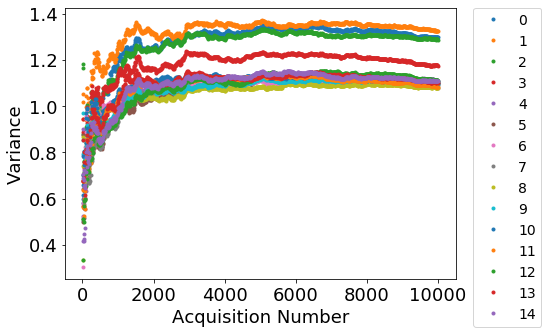

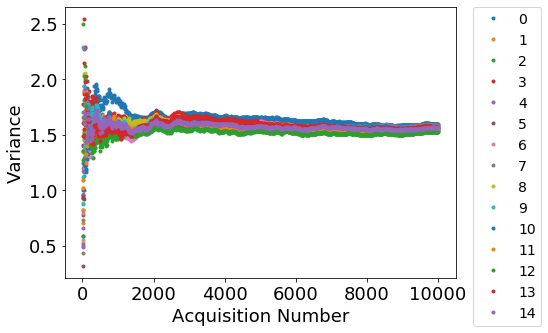

In [12]:
expt_name = 'photon_number_distribution_measurement'
filelist = [2054,2055,2057]

titles = ['qubit in g']
shows = ['I']

import math
import scipy.special
from scipy.optimize import curve_fit

acq_nums = np.arange(1,1000) * 10  # maximum 10000

for ii,i in enumerate(filelist):
    filename = str(i).zfill(5) + "_"+expt_name.lower()+".h5"

    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        swp_cfg = (json.loads(a.attrs['experiment_cfg']))[expt_name.lower()]
        expt_cfg = (json.loads(a.attrs['experiment_cfg']))['photon_number_distribution_measurement']
        print(expt_cfg)
#         print ("cavity pulse type", expt_cfg['cavity_pulse_type'], expt_cfg['mode_index'])
        nu_c = quantum_device_cfg['flux_pulse_info']['1']['cavity_freqs'][expt_cfg['mode_index']]
        chis = quantum_device_cfg['flux_pulse_info']['1']['chiby2pi_e']
        Is,Qs = array(a['I']),array(a['Q'])
        
#         print(len(I), len(I[0]), I)
        all_variances = []
    
        for acq_num in acq_nums:
            I = Is[:, :acq_num]
            g_val = np.mean(I[-2])
            e_val = np.mean(I[-1])
            use_Is = (I - g_val) / (e_val - g_val)
            variances = np.var(use_Is, axis=1)[:-2]
            all_variances.append(variances)


            cov_mat = np.cov(use_Is[:-2])
        
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)
    for j, variance_list in enumerate(np.array(all_variances).T):
        ax.plot(acq_nums, variance_list, '.', label=str(j))
    ax.set_xlabel("Acquisition Number")
    ax.set_ylabel("Variance")
    ax.legend(bbox_to_anchor=(1.22, 1), loc='upper right', borderaxespad=0, fontsize=14)